<a href="https://colab.research.google.com/github/Koush98/Codespaze/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer-Segmentation-Analysis**

**Description**: Using clustering algorithms to segment customers based on
their purchasing behaviour. This helps in understanding the different
types of customers and tailoring marketing strategies to meet their
needs.

**o Why:**
Understanding customer segments allows businesses to target

specific groups with personalized marketing, leading to higher
satisfaction and retention.


**o Tasks:**
▪ Preprocessing the customer data.
▪ Applying clustering K-means clustering.
▪ Analysing and interpretation the clusters.
▪ Present findings with visualizations.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
#The data set link uploaded in github repository
url='https://raw.githubusercontent.com/Koush98/Codespaze/main/Customer-Segmentation-Analysis/Mall_Customers%20(1).csv'

In [4]:

# reading the dataset
df=pd.read_csv(url)

In [5]:

#viewing first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:

# The count of rows and columns
df.shape

(200, 5)

In [7]:
# Count of null
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
# Count of Duplicated values
df.duplicated().sum()

0

In [9]:

# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Statistical description of the numerical features
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


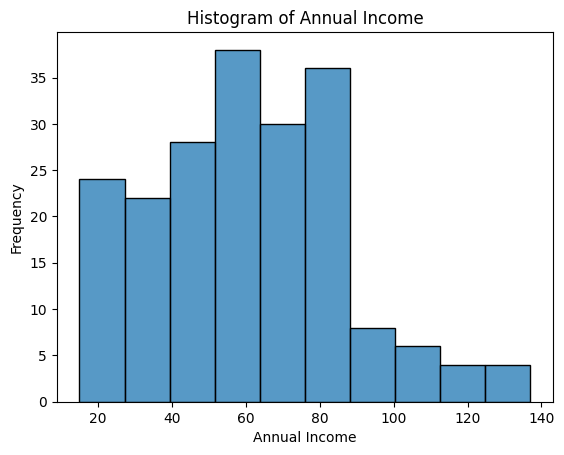

In [29]:
# Histogram of Annual Income
sns.histplot(df["Annual Income (k$)"])
plt.title("Histogram of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

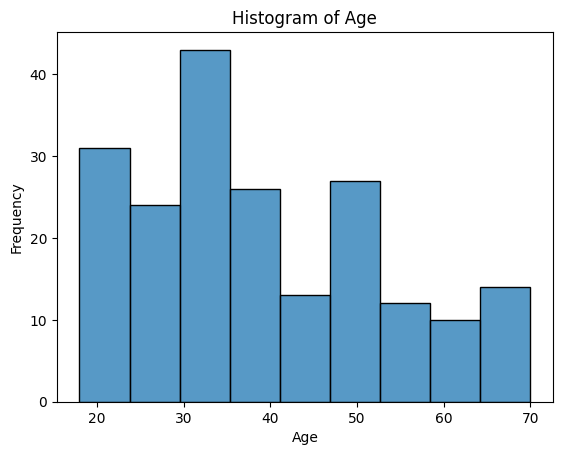

In [31]:

# Histogram of Age
sns.histplot(df["Age"])
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

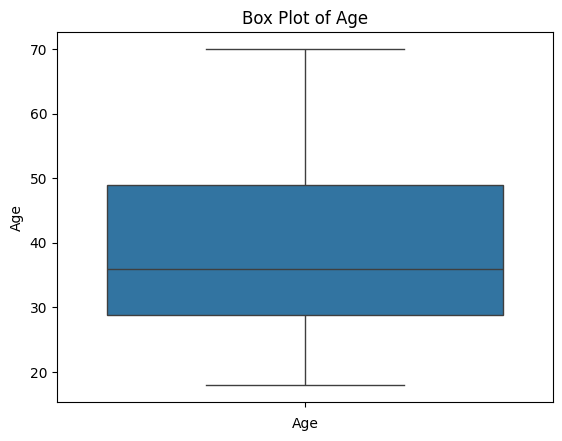

In [32]:

# Box plot of Age
sns.boxplot(df["Age"])
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.show()

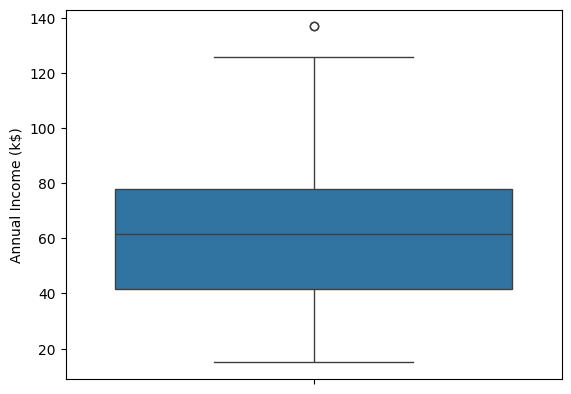

In [13]:
# Box plot of Annual Income
sns.boxplot(df["Annual Income (k$)"])
plt.show()

In [34]:
df[df["Annual Income (k$)"]>130]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


**Remarks**

Customer ID 200 is a valuable prospect with a high income and a high spending score.

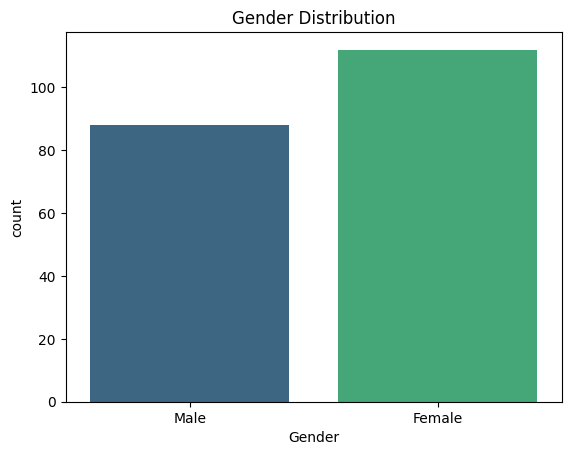

In [35]:
sns.countplot(x='Gender', data=df,hue='Gender', palette='viridis')
plt.title('Gender Distribution')
plt.show()

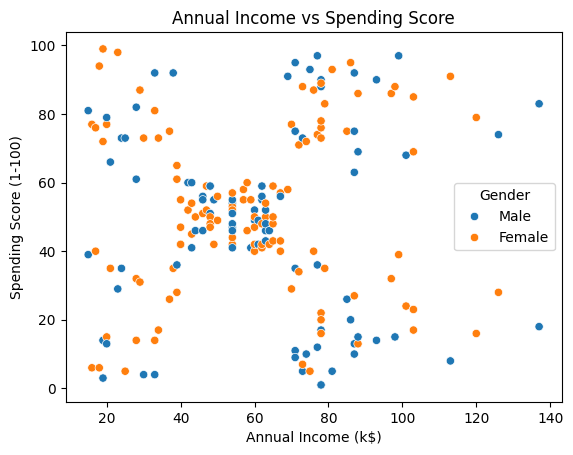

In [36]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.show()

In [47]:
# Droping unnecessary columns like customerID and Age
x=df.drop(['CustomerID','Age','Gender'], axis=1)

In [48]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [49]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [50]:
# Elbow Method to find optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest cluster center

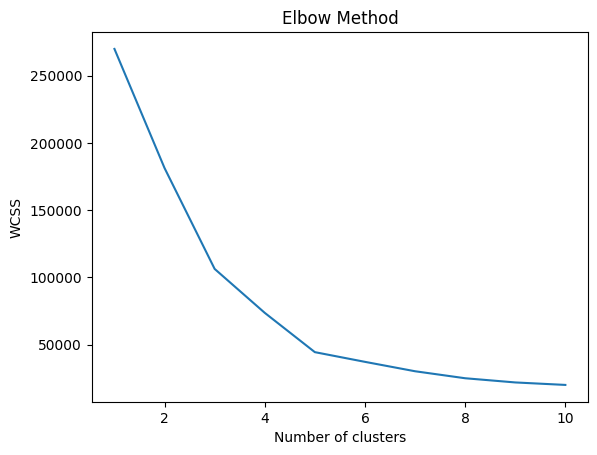

In [23]:
# Plotting the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
# Applying KMeans with the optimal number of clusters (let's say it's 4 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x)

labels = kmeans.labels_

# Add labels to your DataFrame
x['Cluster'] = labels

In [52]:
x['Cluster'] = y_kmeans

In [53]:
x.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


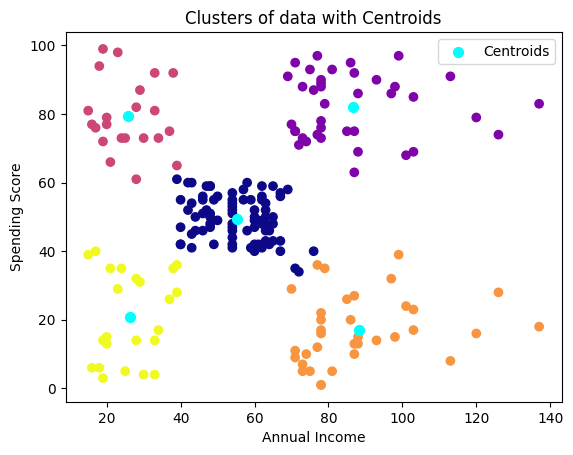

In [61]:
import matplotlib.pyplot as plt

# Visualizing the clusters
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=x['Cluster'], cmap='plasma')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='cyan', label='Centroids')
plt.title('Clusters of data with Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [62]:
# For K-means
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [71]:
import pandas as pd

# Assuming df is your DataFrame and labels are your cluster labels
x['Cluster'] = labels
cluster_summary = x.groupby('Cluster').mean()
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


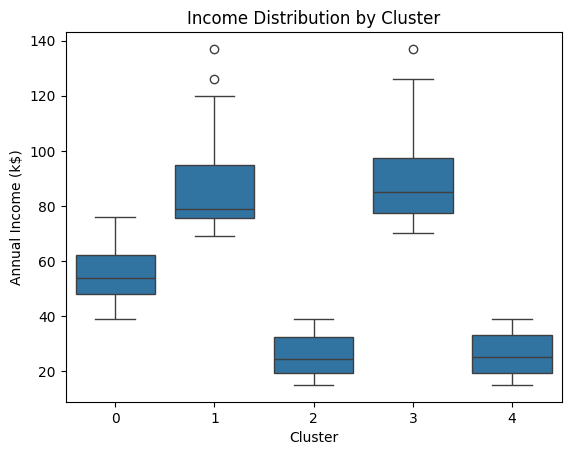

In [68]:


# Visualize feature distributions
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=x)
plt.title('Income Distribution by Cluster')
plt.show()


**Remarks**

Cluster 1 and 3 have higher annual income and cluster 2 and 4 have lowest annual income.

In [66]:
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


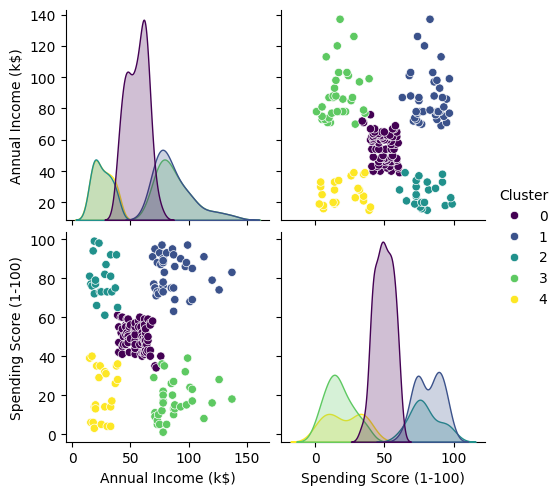

In [73]:
import seaborn as sns

sns.pairplot(x, hue='Cluster', palette='viridis')
plt.show()


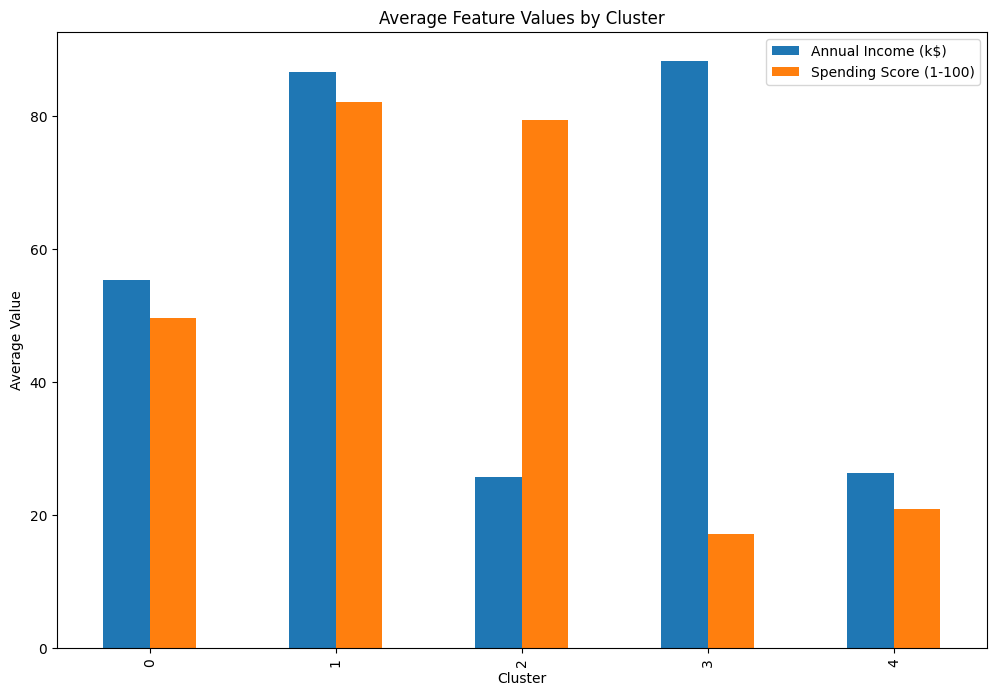

In [74]:
import matplotlib.pyplot as plt

cluster_means = x.groupby('Cluster').mean()
cluster_means.plot(kind='bar', figsize=(12, 8))
plt.title('Average Feature Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.show()


**Remarks**

*Cluster 0* : **Average Spenders** – characterized by average income and average spending score.

*Cluster 1* : **High-Value Customers** – characterized by high income and high spending score.

*Cluster 2*: **High-Spending Bargain Hunters** – characterized by low income but high spending score.

*Cluster 3*: **Low Engagement Customers** – characterized by no income and low spending score.

*Cluster 4*: **Lowest Income Low Spenders** – characterized by the lowest annual income and low spending score.

In [85]:
import pandas as pd

# Assuming df is your DataFrame and 'Cluster' is the column with cluster labels
cluster_names = {
    0: "Average Spenders",
    1: "High-Value Customers",
    2: "High-Spending Bargain Hunters",
    3: "Low Engagement Customers",
    4: "Lowest Income Low Spenders"
}

x['Cluster_Name'] = x['Cluster'].map(cluster_names)


In [87]:
cluster_summary = x.groupby('Cluster_Name').mean()
print(cluster_summary)


                               Annual Income (k$)  Spending Score (1-100)  \
Cluster_Name                                                                
Average Spenders                        55.296296               49.518519   
High-Spending Bargain Hunters           25.727273               79.363636   
High-Value Customers                    86.538462               82.128205   
Low Engagement Customers                88.200000               17.114286   
Lowest Income Low Spenders              26.304348               20.913043   

                               Cluster  
Cluster_Name                            
Average Spenders                   0.0  
High-Spending Bargain Hunters      2.0  
High-Value Customers               1.0  
Low Engagement Customers           3.0  
Lowest Income Low Spenders         4.0  


In [83]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(x[['Annual Income (k$)', 'Spending Score (1-100)']], x['Cluster'])
davies_bouldin_avg = davies_bouldin_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], x['Cluster'])
calinski_harabasz_avg = calinski_harabasz_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], x['Cluster'])

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')


Silhouette Score: 0.553931997444648
Davies-Bouldin Index: 0.5725628995597082
Calinski-Harabasz Index: 247.35899338037288
